Epoch 0, Loss: 556.2019
Epoch 10, Loss: 37.5444
Epoch 20, Loss: 12.6541
Epoch 30, Loss: 14.2474
Epoch 40, Loss: 2.7838
Epoch 50, Loss: 1.5490
Epoch 60, Loss: 1.2102
Epoch 70, Loss: 0.6796
Epoch 80, Loss: 0.4271
Epoch 90, Loss: 0.3211
Epoch 100, Loss: 0.2617
Epoch 110, Loss: 0.2256
Epoch 120, Loss: 0.2053
Epoch 130, Loss: 0.1947
Epoch 140, Loss: 0.1896
Epoch 150, Loss: 0.1873
Epoch 160, Loss: 0.1862
Epoch 170, Loss: 0.1855
Epoch 180, Loss: 0.1850
Epoch 190, Loss: 0.1846
Epoch 200, Loss: 0.1841
Epoch 210, Loss: 0.1837
Epoch 220, Loss: 0.1833
Epoch 230, Loss: 0.1828
Epoch 240, Loss: 0.1823
Epoch 250, Loss: 0.1818
Epoch 260, Loss: 0.1813
Epoch 270, Loss: 0.1807
Epoch 280, Loss: 0.1802
Epoch 290, Loss: 0.1796
Epoch 300, Loss: 0.1790
Epoch 310, Loss: 0.1784
Epoch 320, Loss: 0.1778
Epoch 330, Loss: 0.1772
Epoch 340, Loss: 0.1765
Epoch 350, Loss: 0.1759
Epoch 360, Loss: 0.1752
Epoch 370, Loss: 0.1745
Epoch 380, Loss: 0.1739
Epoch 390, Loss: 0.1732
Epoch 400, Loss: 0.1725
Epoch 410, Loss: 0.171

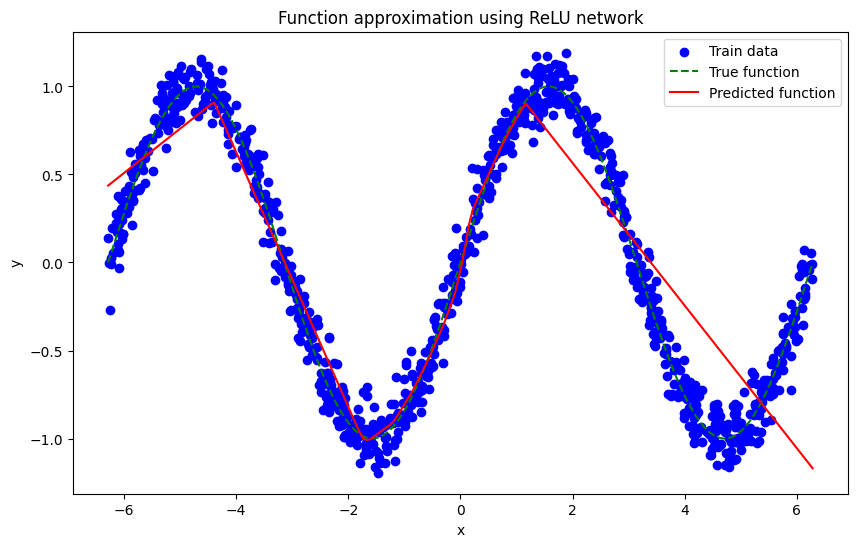

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义要拟合的函数为 sinx
def true_function(x):
    return np.sin(x)

# 基于ReLU的两层神经网络
class ReLU_Network:
    def __init__(self):
        # 权重初始化
        self.W1 = np.random.randn(1, 150).astype(np.float32) * np.sqrt(2/1)  # He初始化
        self.b1 = np.zeros(150, dtype=np.float32)
        self.W2 = np.random.randn(150, 1).astype(np.float32) * np.sqrt(2/100)
        self.b2 = np.zeros(1, dtype=np.float32)
    
    def forward(self, x):
        # 前向传播
        hidden_preactivation = np.dot(x, self.W1) + self.b1
        hidden_layer = np.maximum(0, hidden_preactivation)  # ReLU激活
        output = np.dot(hidden_layer, self.W2) + self.b2
        return output, hidden_layer, hidden_preactivation

# 生成训练集和测试集
num_train_samples = 3000
num_test_samples = 600
x_train = np.random.uniform(-2*np.pi, 2*np.pi, size=(num_train_samples, 1))
y_train = true_function(x_train) + np.random.normal(loc=0, scale=0.1, size=(num_train_samples, 1))
x_test = np.linspace(-2*np.pi, 2*np.pi, num_test_samples).reshape(-1, 1)
y_test = true_function(x_test)

# 转换数据类型
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# 学习率衰减
def learning_rate_schedule(initial_lr, epoch, decay_rate=0.95, decay_steps=100):
    return initial_lr * (decay_rate ** (epoch / decay_steps))

# 训练模型
def train_model(model, x_train, y_train, epochs=2000, initial_learning_rate=0.001):
    losses = []
    for epoch in range(epochs):
        # 动态调整学习率
        learning_rate = learning_rate_schedule(initial_learning_rate, epoch)
        
        # 前向传播
        output, hidden_layer, hidden_preactivation = model.forward(x_train)
        
        # 计算损失
        loss = np.mean((output - y_train)**2)
        losses.append(loss)
        
        # 反向传播
        batch_size = x_train.shape[0]
        d_output = 2 * (output - y_train) / batch_size
        
        # 计算第二层梯度
        dW2 = np.dot(hidden_layer.T, d_output)
        db2 = np.sum(d_output, axis=0)
        
        # 反向传播到隐藏层
        d_hidden = np.dot(d_output, model.W2.T)
        d_preactivation = d_hidden * (hidden_preactivation > 0)  # ReLU导数
        
        # 计算第一层梯度
        dW1 = np.dot(x_train.T, d_preactivation)
        db1 = np.sum(d_preactivation, axis=0)
        
        # 参数更新
        model.W1 -= learning_rate * dW1
        model.b1 -= learning_rate * db1
        model.W2 -= learning_rate * dW2
        model.b2 -= learning_rate * db2
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch:4d}, Loss: {loss:.4f}, Learning Rate: {learning_rate:.6f}")

# 测试模型
def test_model(model, x_test, y_test):
    output, _, _ = model.forward(x_test)
    test_loss = np.mean((output - y_test)**2)
    print(f"\nTest Loss: {test_loss:.4f}")

# 创建并训练模型
model = ReLU_Network()
train_model(model, x_train, y_train, epochs=3000, initial_learning_rate=0.001)
test_model(model, x_test, y_test)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.plot(x_test, y_test, color='green', linestyle='--', label='True function')
plt.plot(x_test, model(x_test), color='red', label='Predicted function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function approximation using ReLU network')
plt.legend()
plt.show()
